In [3]:
from IPython.display import clear_output
import numpy as np
from scipy import misc
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

#### Lecture 6: Advanced Numpy
Welcome back!

Here's what we've got lined up for today:

1. Higher dimensional arrays
2. Indexing (it's easy and universal!)
3. Curve-fitting

###### Learning Objectives

Want to get you more comfortable with syntax, planning and executing your projects, and finding what you need, on Google, or in the inline documentation sources

As always, please follow along, experiment, stumble, and explore in your own notebook

#### Shebang

You can put (and you should) 

\#!/usr/bin/python 

to run more easily in terminal!

#### Review from Tuesday

Covered:

1. Basic numpy syntax

2. Basic plotting

# QUESTIONS?

In [6]:
# I'll use import numpy as np throughout
import numpy as np

# We were able to get data into numpy with np.array()
print(np.array([1,2,3]))

# How to get a numpy array with 0,1,...,48,49?
print(np.array(range(50)))

[1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


In [11]:
# What about 0.0, 0.1, 0.2, ... 0.9?
# does arange include the endpoint? No!
a = np.arange(0,1,0.1)
b = np.linspace(0,0.9,num = 10) # includes endpoint!
c = np.logspace(0,0.9,num = 10)
print(a)
print(b)
print(c)
# arange, linspace, logspace = logarithmic spacing 

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235]


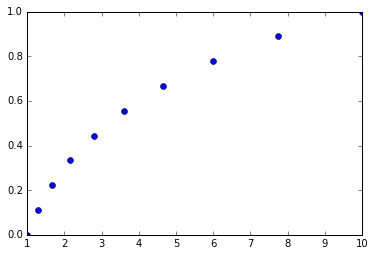

In [15]:
# plotting is easy, how about an exponential curve?
import matplotlib.pyplot as plt
# plot (xaxis,yaxis)
plt.plot(np.logspace(0, 1, 10), np.linspace(0, 1, 10), 'bo')

#plots exp(linspace(0,1,10))
# startpt = 10 **(0)
# endpt = 10 **(1)
# gets rid of annoying axes output... NECESSARY out of IPythonNotebook
plt.show()

In [16]:
# Remember that Python was able to coerce ints to strings?
print(np.array(['Def NaN', 1]))

# Magic!? Nope... numpy finds the 'smallest' type that's 'big enough'
# to hold everything... (strings can 'hold' numbers)

['Def NaN' '1']


In [101]:
# We also saw we could do basic math
a, b = np.array([1,2,3]), np.array([4,5,6])

a + b, a * b
# convenient for specifying lots of calculations in parallel!

(array([5, 7, 9]), array([ 4, 10, 18]))

In [19]:
# Just a note, we can also tell numpy how to convert things
print(np.array(['NaN', 1], dtype= float))

[ nan   1.]


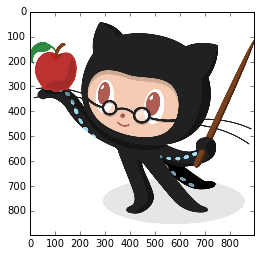

In [21]:
img = misc.imread('/Users/Andrew/Physics-91_SI/lectures/octocat.jpg')
plt.imshow(img)

In [22]:
# Oh and by the way...
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(896, 896, 3)


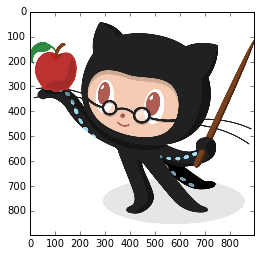

In [27]:
img[:,:,0], img[:,:,1], img[:,:,2] = np.copy(img[:,:,1]), np.copy(img[:,:,2]), np.copy(img[:,:,0])
plt.imshow(img)

In [26]:
# Ahem... to get back to np.array()...
# What if we want to make numbers from strings and other numbery things?

print(np.array(['NaN', '3.14159', 3], float))

[     nan  3.14159  3.     ]


In [67]:
documentation = np.array.__doc__
print("\n".join(documentation.split("\n")[:16]))


array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)

    Create an array.

    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an
        object whose __array__ method returns an array, or any
        (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then
        the type will be determined as the minimum type required
        to hold the objects in the sequence.  This argument can only
        be used to 'upcast' the array.  For downcasting, use the
        .astype(t) method.


In [28]:
# Now that we have arrays in numpy, we can do some more basic math with them

r_ness = np.sum(img[:, :, 0]) / np.prod(img.shape[:-1])
g_ness = np.sum(img[:, :, 1]) / np.prod(img.shape[:-1])
b_ness = np.sum(img[:, :, 2]) / np.prod(img.shape[:-1])
print((r_ness, g_ness, b_ness))

(184.83263163663904, 177.55778783681441, 175.11722611407845)


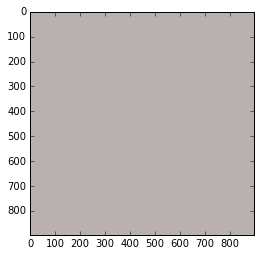

In [29]:
# So average image is...

img[:,:] = (r_ness, g_ness, b_ness)

plt.imshow(img)
plt.show()

##### Getting Higher Dimensional Arrays

In [ ]:
# It was easy to make numpy "lists"


In [72]:
# Not much harder to get higher dimensional arrays!

levi_civita = np.array([[[0,0,0],[0,0,1],[0,-1,0]],
                        [[0,0,-1],[0,0,0],[1,0,0]],
                        [[0,1,0],[-1,0,0],[0,0,0]]])

print(levi_civita)

[[[ 0  0  0]
  [ 0  0  1]
  [ 0 -1  0]]

 [[ 0  0 -1]
  [ 0  0  0]
  [ 1  0  0]]

 [[ 0  1  0]
  [-1  0  0]
  [ 0  0  0]]]


##### Doing this manually is a massive pain!

Lots of helpful utilities exist for constructing "standard" arrays

In [30]:
# Here are a few, maybe want an array of zeros?

print(np.zeros((5,4,3)))

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [31]:
# or an identity matrix?
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [41]:
# np.loadtxt()
numbers = np.loadtxt("numbers.txt")
print(numbers)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


##### Have plenty of arrays how, but now to get data into/out of them?

Basic slicing syntax still works!

In [35]:
# basic slicing
a = np.linspace(0, 19, 20)
print(a)
a[10:15] #slicing is non-inclusive

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.]


array([ 10.,  11.,  12.,  13.,  14.])

In [37]:
# Can also index with stride
a[::-1]
# what would [::-1] do?

array([ 19.,  18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.,   9.,
         8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.])

#### Okay, but what about those higher dimensional arrays?

In [39]:
# can use comma separated list of slices
a = np.random.randn(3, 3)
print(a)

a[2,:] = 0
print('space')
print(a)

[[-1.23979316 -3.137901    0.7685298 ]
 [-1.12002513  1.77394846 -0.69556811]
 [-0.76458369 -0.09487183  0.53005148]]
space
[[-1.23979316 -3.137901    0.7685298 ]
 [-1.12002513  1.77394846 -0.69556811]
 [ 0.          0.          0.        ]]


In [44]:
# This is genuinely different than standard Python lists!
pylist_numbers = [list(l) for l in numbers]
print(pylist_numbers)
print(pylist_numbers[:][1:2])

# not the same! Why?

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]
[[4.0, 5.0, 6.0]]


In [46]:
# Whenever you're slicing in numpy, the thing you need to think
# about is the shape of what you start with, and what you end with
# LHS and RHS of equals should have "similar" shape (broadcasting)

numbers[:,-1] = 0
print(numbers)

pylist_numbers[1][:] = (100,100,100)
print(pylist_numbers)

[[ 1.  2.  0.]
 [ 4.  5.  0.]
 [ 7.  8.  0.]]
[[1.0, 2.0, 3.0], [100, 100, 100], [7.0, 8.0, 9.0]]


#### Logical indexing

We can also slice into arrays using logical expressions!

In [48]:
# get random matrix
a = np.random.randn(3, 3)
print(a)
print(a < 0)
# 2D array of logical expressions

a[a < 0] = 0
print(a)

[[ 1.40120744 -0.36260309 -0.23771379]
 [-0.60785883 -1.15449294 -0.93511434]
 [-0.66670651  0.14905419  0.58014168]]
[[False  True  True]
 [ True  True  True]
 [ True False False]]
[[ 1.40120744  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.14905419  0.58014168]]


#### Index Arrays

We can also set several selections at the same time, like a "union" of the selections

In [158]:
a = np.arange(10, 0, -1)
print(a)

indexes = np.array([1,8,4])
print(a[indexes]) # get second, ninth, fifth thing out of a

[10  9  8  7  6  5  4  3  2  1]
[9 2 6]


#### Syntax Review

In [ ]:
# Can covert between lists and np.ndarray
list(...)
np.array(...) # np.array is the translation function, np.ndarray is the type!

# Useful functions
zeros((3, 4, 5,)) # tuple as argument
eye(5) # integer size as argument
np.linspace(start, finish, steps)
np.arange(start, finish, step_size)
np.logspace(a,b,c) === np.exp(np.linspace(a,b,c))

# Indexing
arr[:,:,5:20] # comma separated list of slices, : means 0:-1 (the whole axis)

# Boolean indexing
arr[arr == 'str'] = 'not str' # replaces all instances of 'str' with 'not str'. Can be any predicate

# Documentation and getting help
# Use function? if you are in IPython
# Google!
# Use intuition!
# Use help(function) in interactive mode (REPL) 

# Plotting
plt.plot(xs, ys)
plt.show() ### DONT FORGET THIS!

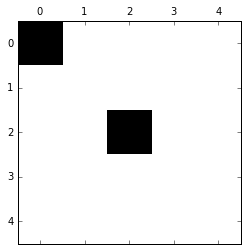

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
m = np.eye(5,5)

m[,:] = 0
plt.spy(m)
plt.show()